# Exploratory Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')

## Read in the ratings and movies tables

In [2]:
movies = pd.read_csv(r'C:\Users\shabn\neuefische\ds-capstone-recommendation\data\ml-latest-small\movies.csv')
ratings = pd.read_csv(r'C:\Users\shabn\neuefische\ds-capstone-recommendation\data\ml-latest-small\ratings.csv')

In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Ratings table 

### How many unique users and movies are in the dataset?

In [6]:
unique_users = ratings["userId"].unique()
len(unique_users)

610

In [7]:
unique_movies = ratings["movieId"].unique()
len(unique_movies)

9724

#### What is the average rating?

In [8]:
ratings["rating"].mean()

3.501556983616962

#### Which rating appears the most?

In [ ]:
ratings["rating"].mode()

#### Count the number of ratings per user.

In [9]:
ratings_by_user = (
    ratings.groupby("userId")[["rating"]].count().sort_values("rating", ascending=False)
)
ratings_by_user.columns = ["ratings_count"]
ratings_by_user

,ratings_count
userId,
414,2698
599,2478
474,2108
448,1864
274,1346
...,...
442,20
569,20
320,20


#### How many users have rated more than 20 movies? 

In [10]:
ratings_by_user[ratings_by_user["ratings_count"] > 20].count()

ratings_count    596
dtype: int64

#### How many movies rated the user with the most/least ratings? 

In [11]:
ratings_by_user["ratings_count"].max()

2698

In [12]:
ratings_by_user["ratings_count"].min()

20

### Histogram to draw the density

<Axes: xlabel='ratings_count', ylabel='Count'>

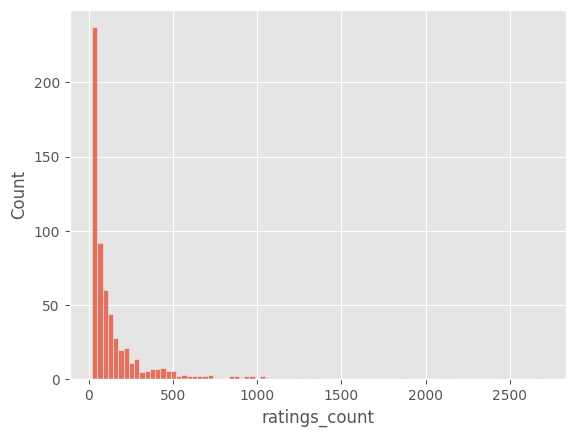

In [13]:
sns.histplot(ratings_by_user["ratings_count"])

#### Calculate the average rating per user

In [15]:
mean_rating_by_user = ratings.groupby("userId")[["rating"]].mean().sort_values("rating", ascending=False)
mean_rating_by_user

,rating
userId,
53,5.000000
251,4.869565
515,4.846154
25,4.807692
30,4.735294
...,...
567,2.245455
153,2.217877
508,2.145833


In [16]:
# Worst average rating 
mean_rating_by_user.head(1)

,rating
userId,
53,5.0


In [17]:
# Best average rating
mean_rating_by_user.tail(1)

,rating
userId,
442,1.275


### Plotting the distribution of average ratings to check for normal distribution

<Axes: ylabel='Count'>

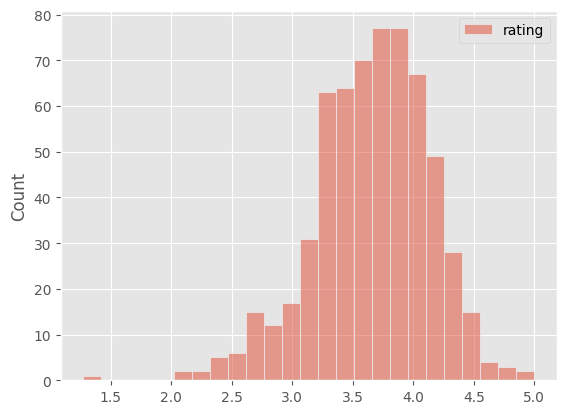

In [18]:
sns.histplot(mean_rating_by_user)

#### Correlation between average rating and the number of ratings 

In [19]:
ratings_corr = ratings.groupby("userId")[["rating"]].agg(["count", "mean"])
ratings_corr["rating"]["count"].corr(ratings_corr["rating"]["mean"])

-0.19899727099822653

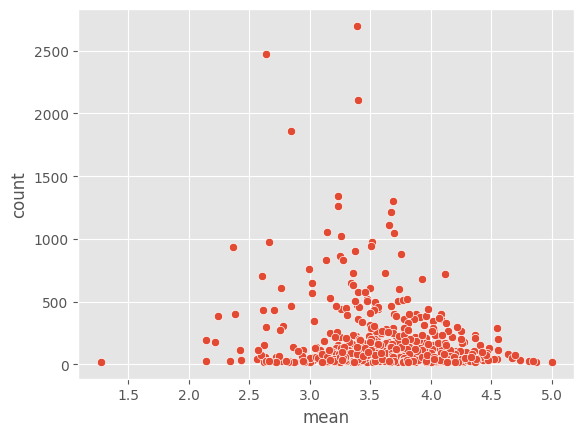

In [20]:
sns.scatterplot(x=ratings_corr["rating"]["mean"], y=ratings_corr["rating"]["count"]);

## Movies Table

#### Are there any duplicated titles? 

In [21]:
movies[movies["title"].duplicated(keep=False)].sort_values("title")

,movieId,title,genres
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
650,838,Emma (1996),Comedy|Drama|Romance
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
9135,147002,Eros (2004),Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi


#### Are there any movieId listed in movies tables that are not in ratings table?

In [22]:
missing_ids = movies[~movies["movieId"].isin(ratings["movieId"].unique())]
missing_ids

,movieId,title,genres
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller
2211,2939,Niagara (1953),Drama|Thriller
2499,3338,For All Mankind (1989),Documentary
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War
4037,5721,"Chosen, The (1981)",Drama
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance
4598,6849,Scrooge (1970),Drama|Fantasy|Musical
4704,7020,Proof (1991),Comedy|Drama|Romance
5020,7792,"Parallax View, The (1974)",Thriller


#### Extract the year out of the title column

In [25]:
movies["year"] = movies["title"].str.extract(r"\((\d{4})\)")
movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


## Split the genre column

#### Merge/join the ratings and movies 

In [26]:
df = movies.merge(ratings, left_on="movieId", right_on="movieId")
df

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5,1305696483
...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,184,3.5,1537109545
100833,193585,Flint (2017),Drama,2017,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018,184,3.5,1537110021


### Number of ratings per movie title

In [27]:
df_ratings_per_movie = (
    df.groupby("title")
    .agg(
        num_ratings=("rating", "count"),
        std=("rating", "std"),
        mean=("rating", "mean"),
    )
    .reset_index()
    .sort_values("num_ratings", ascending=False)
)
df_ratings_per_movie

,title,num_ratings,std,mean
3158,Forrest Gump (1994),329,0.831244,4.164134
7593,"Shawshank Redemption, The (1994)",317,0.713019,4.429022
6865,Pulp Fiction (1994),307,0.951997,4.197068
7680,"Silence of the Lambs, The (1991)",279,0.853983,4.161290
5512,"Matrix, The (1999)",278,0.975243,4.192446
...,...,...,...,...
4773,King Solomon's Mines (1950),1,NaN,3.000000
4772,King Solomon's Mines (1937),1,NaN,2.500000
4771,King Ralph (1991),1,NaN,1.500000
4769,King Kong Lives (1986),1,NaN,2.000000


#### Top 10 most rated movies

In [28]:
df_ratings_per_movie.head(10)

,title,num_ratings,std,mean
3158,Forrest Gump (1994),329,0.831244,4.164134
7593,"Shawshank Redemption, The (1994)",317,0.713019,4.429022
6865,Pulp Fiction (1994),307,0.951997,4.197068
7680,"Silence of the Lambs, The (1991)",279,0.853983,4.161290
5512,"Matrix, The (1999)",278,0.975243,4.192446
8001,Star Wars: Episode IV - A New Hope (1977),251,0.872004,4.231076
4662,Jurassic Park (1993),238,0.855301,3.750000
1337,Braveheart (1995),237,0.967726,4.031646
8363,Terminator 2: Judgment Day (1991),224,0.926833,3.970982
7421,Schindler's List (1993),220,0.975996,4.225000


#### Average rating per movie title

In [29]:
df_avg_by_title = df_ratings_per_movie.sort_values("mean", ascending=False)
df_avg_by_title

,title,num_ratings,std,mean
8121,Stuart Little 3: Call of the Wild (2005),1,NaN,5.0
5627,Mickey's Once Upon a Christmas (1999),1,NaN,5.0
5789,Moonlight,1,NaN,5.0
5796,More (1998),1,NaN,5.0
5809,Moscow Does Not Believe in Tears (Moskva sleza...,1,NaN,5.0
...,...,...,...,...
7868,Sorrow (2015),1,NaN,0.5
8579,The Pumaman (1980),1,NaN,0.5
4617,Journey 2: The Mysterious Island (2012),1,NaN,0.5
9282,"Wasp Woman, The (1959)",1,NaN,0.5


#### Visualization of the distribution of average ratings per movie

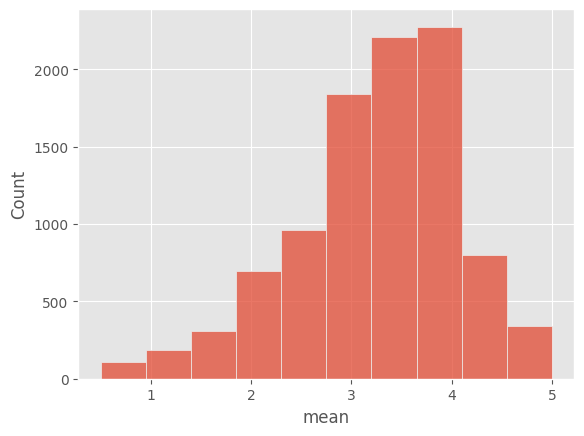

In [30]:
sns.histplot(df_avg_by_title["mean"], bins=10);

#### Which movie was rated the best? 

In [31]:
df_avg_by_title.head(1)

,title,num_ratings,std,mean
8121,Stuart Little 3: Call of the Wild (2005),1,NaN,5.0


In [32]:
df_avg_by_title.tail(1)

,title,num_ratings,std,mean
1595,Case 39 (2009),1,NaN,0.5


In [34]:
df_ratings_per_movie_filtered = df_ratings_per_movie[
    df_ratings_per_movie["num_ratings"] >=30
]
df_ratings_per_movie_filtered

,title,num_ratings,std,mean
3158,Forrest Gump (1994),329,0.831244,4.164134
7593,"Shawshank Redemption, The (1994)",317,0.713019,4.429022
6865,Pulp Fiction (1994),307,0.951997,4.197068
7680,"Silence of the Lambs, The (1991)",279,0.853983,4.161290
5512,"Matrix, The (1999)",278,0.975243,4.192446
...,...,...,...,...
9249,Wallace & Gromit in The Curse of the Were-Rabb...,30,1.113656,3.633333
7690,Silver Linings Playbook (2012),30,0.970987,3.716667
9618,X-Men: Days of Future Past (2014),30,0.780510,3.833333
5429,"Manchurian Candidate, The (1962)",30,0.774040,4.250000


In [35]:
df_ratings_per_movie_filtered.sort_values("mean", ascending=False).head(1)

,title,num_ratings,std,mean
7593,"Shawshank Redemption, The (1994)",317,0.713019,4.429022


In [36]:
df_ratings_per_movie_filtered.sort_values("mean", ascending=False).tail(1)

,title,num_ratings,std,mean
3508,Godzilla (1998),33,0.841907,1.954545


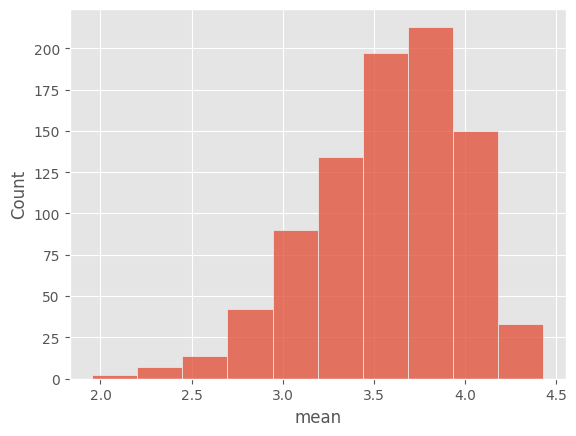

In [37]:
sns.histplot(df_ratings_per_movie_filtered["mean"], bins=10);

### Average rating of movies over time

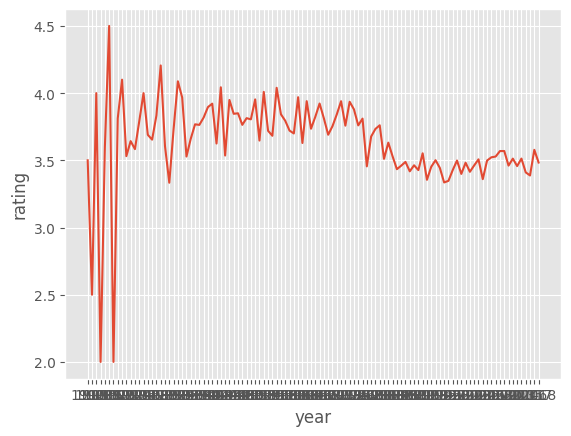

In [38]:
movies_by_year = df.groupby("year")[["rating"]].mean()
movies_by_year

sns.lineplot(movies_by_year["rating"]);